In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

In [3]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
import folium

In [5]:
#Visualize the housing price in California

X1 = np.median(X['Latitude'])
y1 = np.median(X['Longitude'])

In [6]:
m = folium.Map([X1,y1], zoom_start = 4.5, tiles = 'Stamen Toner')

In [7]:
from folium import plugins

In [8]:
lat = X["Latitude"].tolist()
long = X["Longitude"].tolist()

In [9]:
#Use of the heatmap plugin, with higher temperature matching high prices

m.add_child(plugins.HeatMap(zip(lat, long, y), radius = 10))

In [10]:
#Adding house price data to the whole dataset to create a correlation matrix

X['house_price'] = y
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
labels=['Median Income','House Age','Average Rooms','Average Bedrooms','Population','Average Occupancy','Latitude','Longitude','House Price']

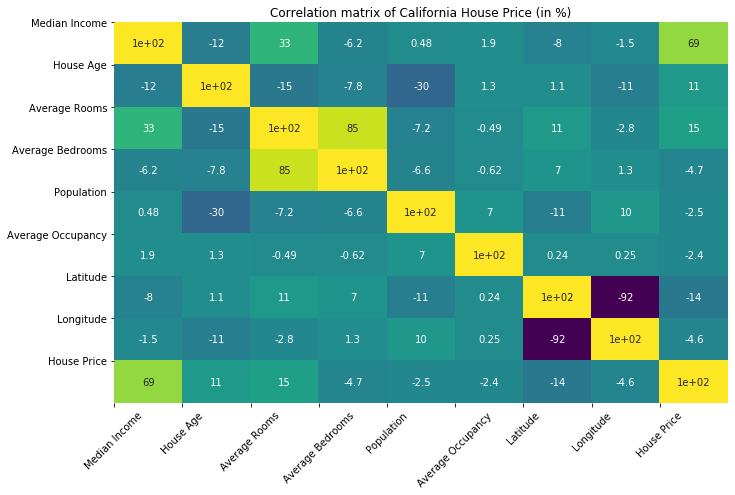

In [12]:
#Plotting a correlation matrix between all features, with data multiplied by 100 to get percentages

plt.figure(figsize=(11,7))
sns.heatmap(cbar=False,annot=True,data=X.corr()*100,cmap='viridis')
plt.title('Correlation matrix of California House Price (in %)')
plt.xticks(range(len(X.columns)), labels, rotation=45)
plt.yticks(range(len(X.columns)), labels)
plt.show()

In [13]:
#Split the dataset in train and test dataset

from sklearn.model_selection import train_test_split
X = X.drop('house_price', axis = 1)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
#Prepare the training dataset

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('std_scaler', StandardScaler()), ('poly_features', PolynomialFeatures(degree =2))])
X_train = pipeline.fit_transform(X_train)

In [15]:
#Run Linear Regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, y_train)

In [16]:
#Get Mean Square Error on train set

from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_train*100000

42418.00625240318

In [17]:
#Get root squared error to avoid negative values

rmse_train = np.sqrt(mse_train)
rmse_train*100000

65129.10735792652

In [18]:
#Evaluate the model on the test set : prepare the data again and run the model and root mean squared error

X_test = pipeline.fit_transform(X_test)
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_pred_test, y_test)
mse_test*100000

63729.89574261328

In [19]:
rmse_test = np.sqrt(mse_test)
rmse_test*100000

79831.00634628958

In [20]:
#Get r2 score on test set

print(r2_score(y_test, y_pred_test))

0.5125190081321853


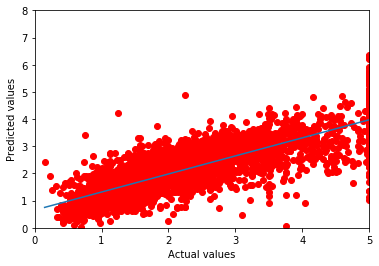

In [21]:
plt.plot(y_test, y_pred_test, 'ro')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.xlim(0, 5)
plt.ylim(0, 8)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_test, 1))(np.unique(y_test)))
plt.show()

In [22]:
#Get min and max values of the house price dataset to analyse the results

y.max()*100000

500000.99999999994

In [23]:
y.min()*100000

14999.000000000002